1. 学习理解什么是极大似然估计。
2. 使用Pandas中的函数，下载上证综指过去1年的收盘数据，以此来计算日收益率序列，对这个数据画出直方图，计算这组数据的各个描述性统计量。
3. 对上述收益率数据，使用参数方法和非参数方法估计其概率密度函数。参数方法选择正态分布和对数正态分布两种假设。基于上述三种方法分别计算收益率小于0的概率。
4. 使用Pandas中的函数，下载你感兴趣的任意两支股票的数据，计算日收益率序列，使用假设检验来判断这两支股票的平均收益率是否有差别。

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 1.理解极大似然估计

## 基本概念

设总体含有待估参数θ，它可以取很多值，我们要在θ的一切可能取值之中选出一个使样本观测值出现的概率为最大的θ值（记为θ'）作为θ的估计，并称θ'为θ 的极大似然估计。一般，当总体分布类型已知时，极大似然估计（MLE）是一种常用的估计方法。

## 数学模型及算法

X的概率密度函数为：p(x;θ),其中θ为未知参数，从总体中获得容量为n的样本观测值x1,x2,x3...,xn，则在X1=x1,X2=x2...,Xn=xn时联合密度函数为：

\begin{equation*}
L(\theta) = \prod_{i=1}^{n} p(x_i,\theta)
\end{equation*}

称为似然函数，对于不同的θ，同一组样本观察值x1,x2...,xn的联合密度函数值不同，因而我们选择θ的极大似然估计θ'应满足：

\begin{equation*}
L(\theta‘) = max L(\theta)
\end{equation*}

当函数关于参数可导时，可通过求导方法获得似然函数极大值对应的参数。为了方便求导，一般会对似然函数取对数，称lnL(θ)为对数似然函数，它与L(θ)在同一点达到最大。通过L(θ)对θ每一分量求偏导并令其为0求得：

\begin{equation*}
\frac{\partial L(\theta)}{\partial \theta_j} = 0
\quad\quad \text{j=1,2,...,k}
\end{equation*}

## 性质

**不变原则：** 设θ'是θ的极大似然估计，g(θ)是θ的连续函数，则g(θ)的极大似然估计为g(θ')  

**渐进正态性：** 设总体X具有密度函数p(x;θ)，未知参数θ属于一个非退化区间，并假定：  

（1）对一切Θ，存在：
\begin{equation*}
\frac{\partial ln(p)}{\partial \theta}
\frac{\partial^2 ln(p)}{\partial \theta^2}
\frac{\partial^3 ln(p)}{\partial \theta^3}
\end{equation*}

（2）对一切Θ，有：

\begin{equation*}
\left|\frac{\partial ln(p)}{\partial \theta}\right| < F_1(x)\\
\left|\frac{\partial^2 ln(p)}{\partial \theta^2}\right| <F_2(x) \\
\left|\frac{\partial^3 ln(p)}{\partial \theta^3}\right| <F_3(x)
\end{equation*}

其中函数：
\begin{equation*}
F_1(x)，F_2(x) 在(-\infty,\infty)上可积，而函数F_3(x)满足：
\int_{-\infty}^{\infty} F_3(x)p(x;\theta)dx<M
\end{equation*}
其中M与θ无关。

（3）对一切θ，有：

\begin{equation*}
0 < E(\frac{\partial ln(p)}{\partial \theta})^2 = \int_{-\infty}^{\infty} (\frac{\partial ln(p)}{\partial \theta})^2p(x;\theta)dx < \infty
\end{equation*}

则在分布参数θ的真值θ0为θ集合的一个内点的情况下，其似然方程：
\begin{equation*}
\frac{\partial ln(p)}{\partial \theta}=0
\end{equation*}
有一个解θ'存在，并对任意ε>0，随着n趋向无穷，有：
\begin{equation*}
P(|\theta'-\theta_0|>ε) \rightarrow 0
\end{equation*}
且θ'渐进服从正态分布：
\begin{equation*}
N(\theta_0,[nE(\frac{\partial ln(p)}{\partial \theta})^2]_{\theta=\theta_0}^{-1})
\end{equation*}

该定理对单参数离散分布场合也成立，只要把定理中的密度函数看成概率函数，积分改成求和即可。

## 通俗理解  

**转载，个别地方有调整**

最大似然法,英文名称是Maximum Likelihood Method，在统计中应用很广。这个方法的思想最早由高斯提出来，后来由菲舍加以推广并命名。

最大似然法是要解决这样一个问题：给定一组数据和一个参数待定的模型，如何确定模型的参数，使得这个确定参数后的模型在所有模型中产生已知数据的概率最大。通俗一点讲，就是在什么情况下最有可能发生已知的事件。

举个例子，假如有一个罐子，里面有黑白两种颜色的球，数目多少不知，两种颜色的比例也不知。我们想知道罐中白球和黑球的比例，但我们不能把罐中的球全部拿出来数。现在我们可以每次任意从已经摇匀的罐中拿一个球出来，记录球的颜色，然后把拿出来的球 再放回罐中。这个过程可以重复，我们可以用记录的球的颜色来估计罐中黑白球的比例。假如在前面的一百次重复记录中，有七十次是白球，请问罐中白球所占的比 例最有可能是多少？

我想很多人立马有答案：70%。这个答案是正确的。可是为什么呢？其实，在很多常识的背后，都有相应的理论支持。在上面的问题中，就有最大似然法的支持。

我们假设罐中白球的比例是p，那么黑球的比例就是1-p。因为每抽一个球出来，在记录颜色之后，我们把抽出的球放回了罐中并摇匀，所以每次抽出来的球的颜 色服从同一独立分布。这里我们把一次抽出来球的颜色称为一次抽样。题目中在一百次抽样中，七十次是白球的概率是P(Data | M)，这里Data是所有的数据，M是所给出的模型，表示每次抽出来的球是白色的概率为p。如果第一抽样的结果记为x1，第二抽样的结果记为x2，。。。 那么Data = (x1,x2,...,x100)。这样，
P(Data | M)
= P(x1,x2,...,x100|M)
= P(x1|M)P(x2|M)...P(x100|M)
= p^70(1-p)^30.
那么p在取什么值的时候，P(Data |M)的值最大呢？将p^70(1-p)^30对p求导，并其等于零。
70p^69(1-p)^30-p^70*30(1-p)^29=0。
解方程可以得到p=0.7。
在边界点p=0,1，P(Data|M)=0。所以当p=0.7时，P(Data|M)的值最大。这和我们常识中按抽样中的比例来计算的结果是一样的。

接着想到了连续变量。

假如我们有一组连续变量的采样值（x1,x2,...,xn），我们知道这组数据服从正态分布，标准差已知。请问这个正态分布的期望值为多少时，产生这个 已有数据的概率最大？
P(Data | M) = ??

求导，u=(x1+x2+...+xn)/n.这个正态分布的期望值，就是这组数据的均值。在我们的日常生活和工作中，我们经常会用到平均值，这是有道理的，可以用最大似然法来解释。如果数据服从正态分布，这是最可能的数据。

最大似然法原理简单，应用很广。举个例子，这样的情况在生活会经常遇到。假如人们会感染一种病毒，有一种测试方法，在被测试者已感染这个病毒时，测试结果 为阳性的概率为95%。在被测试者没有感染这个病毒时，测试结果为阳性的概率为2%。现在，有一个人的测试结果为阳性，问这个人感染了病毒吗？根据最大似 然法，如果一个人感染病毒，95%的测试结果会为阳性；而如果这个人没有感染病毒，只有2%的测试结果会为阳性，所以这个人应该是已经感染病毒了。

最大似然法应用广泛，但是经常会受到一种批评，而且对于这种批评，尤其在数据量比较小的时候，最大似然法的支持者没有很多充分的反驳理由：在最大似然法 中，只考虑了由一个模型产生一个已知数据的概率，而没有考虑模型本身的概率。相对应的考虑了模型本身概率的方法，是贝叶斯方法（Bayesian method)。

在上面测试病毒的例子中，如果我们知道在整体人群中，只有1%人会感染这种病毒，那么，根据贝叶斯方法，这个被测试者只有1/3左右的可能性感染了病毒 {1%*95%/(1%*95%+99%*2%)=32.4%}
在这里，我们看到先验概率对结果的影响很大。

不过，当数据量比较大的时候，先验概率的影响就会减小。比如，人们在被检测出感染了一个严重的病毒后，一般会去其他医院复查。假如同一个人在三家医院进行了独立的检查，结果都是阳性。那么，这个人真正感染了病毒的概率有多大？在这个人感染病毒时，出现这种检测结果的可能性为95%*95%*95% = 85.7%；而在这个人没有感染病毒时，出现这种检测结果的可能性为2%*2%*2% = 0.000008。根据最大似然法，我们应选择这个人感染了病毒。

根据贝叶斯方法，这个人感染病毒的概率为1%*95%*95%*95%/(1%*95%*95%*95%+99%*2%*2%*2%) = 99.9%。

在以后的一个应用中，才对“模型已知，参数未定”这一要求有了进一步的认识。


原文在**[这里](http://www.zhizhihu.com/html/y2010/1520.html)**


# 2.大盘日收益率

In [3]:
import pandas as pd
import tushare as ts
import datetime

## 收益率

收益率一般有两种计算方式，一种是单期的简单收益率，另一种是计算复利的连续复合收益率。

单期简单收益率：
\begin{equation*}
1 + R_t = \frac{P_t}{P_{t-1}} \\
R_t = \frac{(P_t-P_{t-1})}{P_{t-1}}
\end{equation*}

多期（k期）简单收益率：
\begin{equation*}
R_{kt} = \sum_{i=1}^k R_t
\end{equation*}

连续复合收益率（单期）：
\begin{equation*}
r_t = ln(1+R_t) = ln \frac{P_t}{P_{t-1}} = ln(P_t) - ln(P_{t-1})
\end{equation*}

连续复合收益率（k期）：
\begin{equation*}
r_t[k] = ln(P_t)-ln(P_{t-k+1}) = ln(P_t)-ln(P_{t-1}) + ln(P_{t-1})-ln(P_{t-2}) +...+ ln(P_{t-k-2}) -ln(P_{t-k+1}) \\= r_t+ r_{t-1}+...+r_{t-k+1}
\end{equation*}

有两篇文章基本将这个问题描述清楚了：  
[处理金融数据为什么要对数化](https://www.zhihu.com/question/20064721)  
[自然对数于股票收益率](http://blog.163.com/shyang_li@126/blog/static/952031020094260227810)

## e

说起收益率，不得不说一下大名鼎鼎的e，也就是增长极限：

\begin{equation*}
growth = \lim_{n \rightarrow +\infty} (1+ \frac{100\%}{n})^n = 2.718281828...
\end{equation*}

它的含义是单位时间内，持续的翻倍增长所能达到的极限值。所以，利率最多的增长就是e。  
换成利率（t表示年）表示：

\begin{equation*}
growth = e^{rt}
\end{equation*}

这就是增长率的通用计算公式。我们可以很快算出实际收益。
另外，用72除以增长率就是翻倍的大约时间，也就是经济学上著名的[72法则](https://zh.wikipedia.org/zh/72法則)  

关于e，有篇文章描述的非常清楚（同时里面还有另一篇介绍e基础的文章链接）：  
[e，一个常数的传奇](http://www.physixfan.com/archives/1371)

## Step1：读取数据

In [ ]:
from pandas_datareader import data, wb
import pandas.io.data as web

In [13]:
sh = web.DataReader("000001.SS", 'yahoo', start='2015-09-30', end='2016-09-30')

In [4]:
#sh = data.DataReader("000001.SS", 'yahoo', "2015-1-1", "2016-5-27")
sh = ts.get_hist_data('sh', start='2015-09-30', end='2016-09-30')

In [90]:
google = web.DataReader("GOOGL", 'yahoo', start='2015-09-30', end='2016-09-30')

## Step2：探索数据

In [15]:
sh.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-09-30,3052.78,3052.78,3052.78,3052.78,0,3052.78
2015-10-12,3287.66,3287.66,3287.66,3287.66,0,3287.66
2015-10-14,3262.44,3262.44,3262.44,3262.44,0,3262.44
2015-10-15,3338.07,3338.07,3338.07,3338.07,0,3338.07
2015-10-16,3391.35,3391.35,3391.35,3391.35,0,3391.35


In [145]:
sh.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,2.470000e+02,2.470000e+02
mean,3383.393850,3431.607097,3387.269036,3330.598721,3.133212e+06,-6.897381,-0.155263,3402.931737,3421.429437,3453.477300,3.179796e+06,3.228594e+06,3.303285e+06
std,577.876731,588.856362,574.307176,551.972649,1.655280e+06,89.316978,2.464555,580.194230,583.688210,578.336815,1.616697e+06,1.592419e+06,1.543688e+06
min,2652.850000,2735.260000,2655.660000,2638.300000,7.056912e+05,-345.350000,-8.490000,2713.448000,2734.699000,2785.652000,1.091824e+06,1.150535e+06,1.319294e+06
25%,2947.345000,2986.040000,2951.245000,2912.435000,1.922865e+06,-39.100000,-1.195000,2959.100000,2963.020000,2981.928000,2.007426e+06,2.109901e+06,2.118971e+06
50%,3203.560000,3298.630000,3232.350000,3178.900000,2.668821e+06,3.280000,0.110000,3251.444000,3303.197000,3355.713000,2.590065e+06,2.506967e+06,2.681256e+06
75%,3627.740000,3663.845000,3641.480000,3600.080000,3.988699e+06,42.380000,1.260000,3631.191000,3643.410500,3687.644000,4.034897e+06,4.066548e+06,4.240627e+06
max,5174.418000,5178.191000,5166.350000,5103.401000,8.550351e+06,224.190000,5.760000,5127.879000,5052.792000,4925.927000,7.287152e+06,6.936106e+06,6.499393e+06


In [146]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 2016-05-31 to 2015-05-29
Data columns (total 13 columns):
open            247 non-null float64
high            247 non-null float64
close           247 non-null float64
low             247 non-null float64
volume          247 non-null float64
price_change    247 non-null float64
p_change        247 non-null float64
ma5             247 non-null float64
ma10            247 non-null float64
ma20            247 non-null float64
v_ma5           247 non-null float64
v_ma10          247 non-null float64
v_ma20          247 non-null float64
dtypes: float64(13)
memory usage: 27.0+ KB


## Step3：数据处理

In [5]:
sh =sh.sort_index() #按时间排序

In [6]:
sh.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2015-09-30,3052.84,3073.30,3052.78,3039.74,1466424.50,14.64,0.48,3085.344,3106.875,3127.993,1831488.50,2193528.73,2681256.30
2015-10-08,3156.07,3172.28,3143.36,3133.13,2342760.50,90.58,2.97,3085.478,3112.605,3126.830,1874265.15,2110201.88,2582178.10
2015-10-09,3146.64,3192.72,3183.15,3137.79,2348514.50,39.79,1.27,3103.638,3121.128,3127.978,1871440.30,2135877.92,2480518.75
2015-10-12,3193.54,3318.71,3287.66,3188.41,3862947.25,104.51,3.28,3141.018,3134.240,3138.341,2330574.70,2282275.30,2525432.05
2015-10-13,3262.16,3298.63,3293.23,3253.25,2971531.25,5.57,0.17,3192.036,3145.001,3144.480,2598435.60,2304642.28,2546300.88


### 计算收益率  
单期收益率数据本来就有，我们只需要计算复合收益率即可。

In [16]:
sh_adj = sh.drop(sh.columns[[0,1,2,4,5]],axis=1)

In [17]:
sh_adj.index = pd.to_datetime(sh_adj.index)

In [19]:
sh_adj.columns = ["close","rs"]

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [23]:
sh_adj.head()

,Close
Date,
2015-09-30,3052.78
2015-10-12,3287.66
2015-10-14,3262.44
2015-10-15,3338.07
2015-10-16,3391.35


In [91]:
google.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-09-30,631.830017,639.309998,629.150024,638.369995,2647700,638.369995
2015-10-01,637.940002,643.840027,631.119995,642.000000,2125300,642.000000
2015-10-02,638.010010,657.000000,633.500000,656.989990,2439400,656.989990
2015-10-05,661.599976,673.030029,655.869995,671.679993,1898000,671.679993
2015-10-06,669.349976,678.799988,663.080017,671.640015,2138700,671.640015


In [92]:
google['r'] = ((google['Close']-google['Close'].shift(1))/google['Close'].shift(1))*100

In [94]:
google.head()

,Open,High,Low,Close,Volume,Adj Close,r
Date,,,,,,,
2015-09-30,631.830017,639.309998,629.150024,638.369995,2647700,638.369995,NaN
2015-10-01,637.940002,643.840027,631.119995,642.000000,2125300,642.000000,0.568637
2015-10-02,638.010010,657.000000,633.500000,656.989990,2439400,656.989990,2.334889
2015-10-05,661.599976,673.030029,655.869995,671.679993,1898000,671.679993,2.235955
2015-10-06,669.349976,678.799988,663.080017,671.640015,2138700,671.640015,-0.005952


In [38]:
sh_adj['Cindy'] = sh_adj['Close'].diff()[1:]/sh_adj['Close'][:-1]*100

In [24]:
sh_adj['r'] = ((sh_adj['Close']-sh_adj['Close'].shift(1))/sh_adj['Close'])*100

In [ ]:
sh_adj['r2'] = ((sh_adj['Close']-sh_adj['Close'].shift(1))/sh_adj['Close'])*100

In [36]:
sh_adj['r3'] = ((sh_adj['Close']-sh_adj['Close'].shift(1))/sh_adj['Close'].shift(1))*100

In [55]:
sh_adj['Cindy2'] = sh_adj['Close'].diff()[1:]/sh_adj['Close'][:-1]*100

In [57]:
sh_adj['Close'].diff()[1]/sh_adj['Close'][0]*100

7.6939707414225609

In [67]:
a = sh['Close'].diff()[1:]

In [69]:
b = sh['Close'][:-1]

In [73]:
sh_adj['test']=np.ones(len(sh_adj.index))

In [88]:
sh_adj['test'][1:] = [sh_adj.ix[i, 'Close'] for i in sh_adj.index[:-1]]

In [89]:
sh_adj.head()

,Close,r,Cindy,r3,Cindy2,test
Date,,,,,,
2015-09-30,3052.78,NaN,NaN,NaN,NaN,3052.78
2015-10-12,3287.66,7.144291,7.144291,7.693971,7.144291,3052.78
2015-10-14,3262.44,-0.773041,-0.773041,-0.767111,-0.773041,3287.66
2015-10-15,3338.07,2.265680,2.265680,2.318204,2.265680,3262.44
2015-10-16,3391.35,1.571056,1.571056,1.596132,1.571056,3338.07


In [12]:

sh_adj['rc'] = np.log(sh_adj['close']/(sh_adj['close'].shift(1)))*100

In [13]:
sh_adj.head()
# 单期收益率（rs）比复合收益率（rc）略大。
# 删除行：dropna(axis=0)  .dropna(how='any')

,close,rs,rc
date,,,
2015-05-29,4611.744,-0.18,NaN
2015-06-01,4828.738,4.71,4.597906
2015-06-02,4910.527,1.69,1.679612
2015-06-03,4909.978,-0.01,-0.011181
2015-06-04,4947.102,0.76,0.753249


## Step4：数据分析

* 均值、中位数、最大值、最小值  
* 方差、标准差、四分位距  

In [14]:
rs=sh_adj['rs'][1:]

In [15]:
rc=sh_adj['rc'][1:]

In [16]:
rs.head()

date
2015-06-01    4.71
2015-06-02    1.69
2015-06-03   -0.01
2015-06-04    0.76
2015-06-05    1.54
Name: rs, dtype: float64

In [17]:
rs.size

246

In [18]:
rc.head()

date
2015-06-01    4.597906
2015-06-02    1.679612
2015-06-03   -0.011181
2015-06-04    0.753249
2015-06-05    1.524453
Name: rc, dtype: float64

In [200]:
# 均值
np.mean(rs),np.mean(rc)
# 说明平均是亏损的

(-0.15516260162601633, -0.18625230972387646)

In [201]:
# 中位数
np.median(rs),np.median(rc)
# 说明前半段时间是盈利的，后期开始亏损

(0.125, 0.12397329570214555)

In [206]:
# 最大值
np.max(rs),np.max(rc)

(5.7599999999999998, 5.6036120268484586)

In [207]:
# 最小值
np.min(rs),np.min(rc)

(-8.4900000000000002, -8.8729056091908074)

In [217]:
# 方差
np.var(rs),np.var(rc)

(6.0740298516094935, 6.22486348443352)

In [241]:
rs.var(ddof=1),rc.var(ddof=1)

(6.098821810187494, 6.250271090492433)

In [218]:
# 标准差
np.std(rs),np.std(rc)

(2.4645546964126184, 2.494967631941048)

In [242]:
rs.std(ddof=1),rc.std(ddof=1)

(2.469579277971755, 2.500054217510579)

In [239]:
# rs四分位距
np.percentile(rs,(25,50,75,100))

array([-1.2125,  0.125 ,  1.265 ,  5.76  ])

In [240]:
# rc四分位距
np.percentile(rc,(25,50,75,100))

array([-1.21741016,  0.1239733 ,  1.25462089,  5.60361203])

In [20]:
sh_adj_des = sh_adj.drop(sh_adj.columns[[0]],axis=1).describe()

In [215]:
sh_adj_des

,rs,rc
count,247.000000,246.000000
mean,-0.155263,-0.186252
std,2.464555,2.500054
min,-8.490000,-8.872906
25%,-1.195000,-1.217410
50%,0.110000,0.123973
75%,1.260000,1.254621
max,5.760000,5.603612


# 3.概率密度

## 参数方法估计概率密度函数

### 概率密度函数

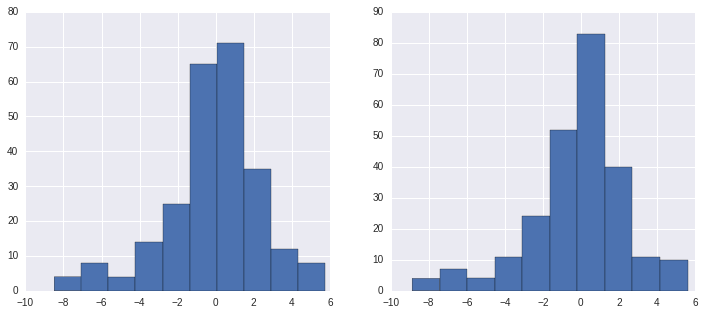

In [21]:
fig, axes= plt.subplots(1,2,figsize=(12,5))

#axes[0].hist(rs,normed=True)
#axes[1].hist(rc,normed=True)

axes[0].hist(rs);
axes[1].hist(rc);

In [22]:
np.random.seed(123456789)

In [23]:
mu1, sigma1 = rs.mean(), rs.std()

In [24]:
mu2, sigma2 = rc.mean(), rc.std()

In [25]:
n=246

In [26]:
TDs = stats.norm(mu1, sigma1)

In [27]:
TDc = stats.norm(mu2, sigma2)

In [28]:
TD1 = stats.norm(mu1, sigma1).rvs(n)

In [29]:
TD2 = stats.norm(mu2, sigma2).rvs(n)

In [136]:
t1, p1 = stats.ttest_ind(TD1, rs)

In [32]:
t2, p2 = stats.ttest_ind(TD2, rc)

In [137]:
t1,p1

(-0.69567794857971943, 0.48696034314329906)

In [34]:
t2,p2

(-0.12495054969194372, 0.90061394360813551)

p值太大，不能拒绝原假设（rs和rc服从正态分布），因此rs和rc可看作服从正态分布。

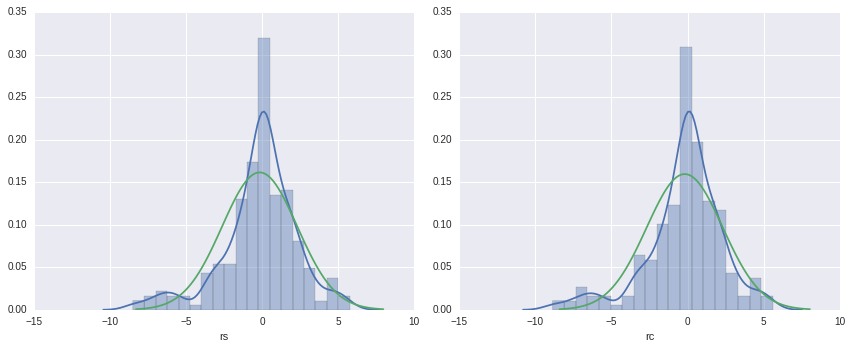

In [35]:
fig , axes = plt.subplots(1,2,figsize=(12,5))

sns.distplot(rs, ax=axes[0])
x = np.linspace(*TDs.interval(0.999), num=100)
axes[0].plot(x, TDs.pdf(x))

sns.distplot(rc, ax=axes[1])
x = np.linspace(*TDc.interval(0.999), num=100)
axes[1].plot(x, TDc.pdf(x))

fig.tight_layout()

### 收益率小于0的概率

In [36]:
rs2 = rs<0;
rc2 = rc<0;

In [37]:
rs2.value_counts()/len(rs2)

False    0.520325
True     0.479675
Name: rs, dtype: float64

In [38]:
rc2.value_counts()/len(rc2)

False    0.520325
True     0.479675
Name: rc, dtype: float64

In [39]:
TDs.cdf(0)

0.52504889013623157

In [40]:
TDc.cdf(0)

0.52969345420136238

对rs，实际小于0的比例为：48%，但估计的结果为52.5%;  
对rc，实际小于0的比例为：48%，但估计的结果为53%。

## 非参数方法估计概率密度函数

### 概率密度函数

In [41]:
kde1 = stats.kde.gaussian_kde(rs)

In [42]:
kde_low_bw1 = stats.kde.gaussian_kde(rs, bw_method=0.15)

In [43]:
kde2 = stats.kde.gaussian_kde(rc)

In [44]:
kde_low_bw2 = stats.kde.gaussian_kde(rc, bw_method=0.15)

In [45]:
x1 = np.linspace(min(rs),max(rs),100)

In [46]:
x2 = np.linspace(min(rc),max(rc),100)

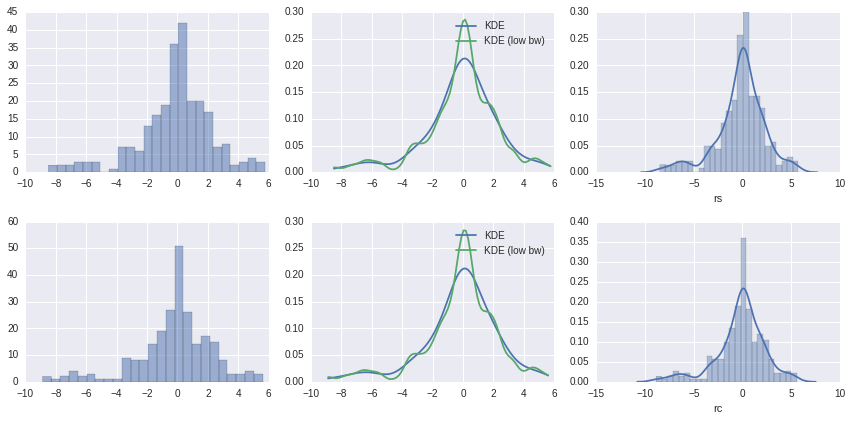

In [47]:
fig ,axes = plt.subplots(2,3,figsize=(12,6))

axes[0,0].hist(rs, alpha=0.5, bins=25)
axes[0,1].plot(x1, kde1(x1), label="KDE")
axes[0,1].plot(x1, kde_low_bw1(x1), label="KDE (low bw)")
#axes[1].plot(x, rs.pdf(x), label="True PDF")
axes[0,1].legend()
sns.distplot(rs, bins=25, ax=axes[0,2])

axes[1,0].hist(rc, alpha=0.5, bins=25)
axes[1,1].plot(x2, kde2(x2), label="KDE")
axes[1,1].plot(x2, kde_low_bw2(x2), label="KDE (low bw)")
#sns.distplot(rc, bins=25, ax=axes[1,1])
#axes[1].plot(x, rs.pdf(x), label="True PDF")
axes[1,1].legend()
sns.distplot(rc, bins=25, ax=axes[1,2])

fig.tight_layout()

# 看着有点像正态分布，因此可试用正态分布。

In [49]:
kde1.resample(10)

array([[-1.53584925,  1.71239948, -0.45115801,  1.4488507 , -0.7976659 ,
         1.84093794,  0.35546927,  1.67930768, -2.1352192 ,  1.68119376]])

In [51]:
kde2.resample(10)

array([[ 2.2393343 ,  2.09614995, -2.69868993, -0.31807468, -3.90945223,
        -0.27579683, -8.24750433, -0.02230852, -3.50314568,  1.97958885]])

In [52]:
def _kde_cdf1(x1):
    return kde1.integrate_box_1d(-np.inf, x1) 

In [53]:
kde_cdf1 = np.vectorize(_kde_cdf1)

In [54]:
def _kde_cdf2(x2):
    return kde2.integrate_box_1d(-np.inf, x2) 

In [55]:
kde_cdf2 = np.vectorize(_kde_cdf2)

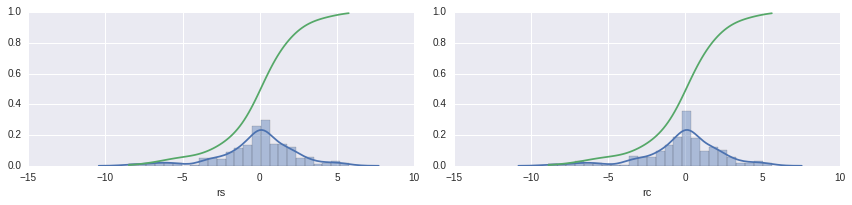

In [56]:
fig, axes = plt.subplots(1,2,figsize=(12,3))

sns.distplot(rs, bins=25, ax=axes[0])
#x1 = np.linspace(min(rs),max(rs),100)
axes[0].plot(x1,kde_cdf1(x1))

sns.distplot(rc, bins=25, ax=axes[1])
#x2 = np.linspace(min(rc),max(rc),100)
axes[1].plot(x2,kde_cdf2(x2))

fig.tight_layout()

### 收益率小于0的概率

In [58]:
kde_cdf1(0)

array(0.48824766139650083)

In [59]:
kde_cdf2(0)

array(0.4888418133278765)

对rs，实际小于0的比例为：48%，估计的结果为48.8%;  
对rc，实际小于0的比例为：48%，估计的结果为48.9%。  
**可以发现，非参数估计结果更加准确。**

# 4.股票对比

## Step1：读取数据

In [69]:
pa = ts.get_hist_data('601318', start='2015-05-29', end='2016-05-31') #中国平安

In [65]:
kd = ts.get_hist_data('002230', start='2015-05-29', end='2016-05-31') #科大讯飞

## Step2：数据处理

In [66]:
kd.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2016-05-31,27.11,29.26,29.03,27.11,410502.84,2.15,8.00,27.862,28.012,27.704,245283.89,318340.90,297650.45,3.60
2016-05-30,27.22,27.30,26.88,26.71,170247.23,-0.69,-2.50,27.772,27.902,27.582,233451.53,305166.61,290630.40,1.49
2016-05-27,27.88,28.18,27.57,27.52,150513.86,-0.27,-0.97,27.982,28.073,27.504,247266.67,327073.70,297228.85,1.32
2016-05-26,27.68,28.25,27.84,27.00,225438.30,-0.15,-0.54,27.950,27.996,27.487,276280.18,333090.66,300024.03,1.98
2016-05-25,28.97,29.00,27.99,27.95,269717.22,-0.59,-2.06,28.008,27.955,27.456,306126.87,346748.73,309480.59,2.37


In [70]:
pa.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2016-05-31,31.94,33.50,32.70,31.94,758825.88,0.79,2.48,31.900,31.841,31.693,292294.96,298696.19,320422.50,0.70
2016-05-30,31.75,31.94,31.94,31.50,220975.00,0.34,1.08,31.690,31.723,31.652,177633.98,243505.28,307940.19,0.20
2016-05-27,31.70,31.71,31.60,31.58,140987.52,-0.03,-0.10,31.666,31.691,31.656,188916.07,245526.07,309867.01,0.13
2016-05-26,31.61,31.79,31.62,31.50,203561.39,0.01,0.03,31.712,31.702,31.686,195797.03,270692.40,314189.46,0.19
2016-05-25,31.83,31.88,31.64,31.59,137125.00,0.00,0.00,31.756,31.712,31.717,212118.86,307205.90,320474.46,0.13


In [119]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 2015-05-29 to 2016-05-31
Data columns (total 14 columns):
open            202 non-null float64
high            202 non-null float64
close           202 non-null float64
low             202 non-null float64
volume          202 non-null float64
price_change    202 non-null float64
p_change        202 non-null float64
ma5             202 non-null float64
ma10            202 non-null float64
ma20            202 non-null float64
v_ma5           202 non-null float64
v_ma10          202 non-null float64
v_ma20          202 non-null float64
turnover        202 non-null float64
dtypes: float64(14)
memory usage: 23.7+ KB


In [120]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 2015-05-29 to 2016-05-31
Data columns (total 14 columns):
open            247 non-null float64
high            247 non-null float64
close           247 non-null float64
low             247 non-null float64
volume          247 non-null float64
price_change    247 non-null float64
p_change        247 non-null float64
ma5             247 non-null float64
ma10            247 non-null float64
ma20            247 non-null float64
v_ma5           247 non-null float64
v_ma10          247 non-null float64
v_ma20          247 non-null float64
turnover        247 non-null float64
dtypes: float64(14)
memory usage: 28.9+ KB


In [71]:
pa =pa.sort_index() #按时间排序
kd =kd.sort_index()

In [78]:
pad = pa.drop(pa.columns[[0,1,3,4,5,6,7,8,9,10,11,12,13]],axis=1)

In [79]:
kdd = kd.drop(kd.columns[[0,1,3,4,5,6,7,8,9,10,11,12,13]],axis=1)

## Step3：计算日收益率

根据上面的分析，两种收益率差别并不大，这里，我们将使用复合收益率。

In [80]:
pad.head()

,close
date,
2015-05-29,85.44
2015-06-01,87.41
2015-06-02,86.38
2015-06-03,85.54
2015-06-04,88.01


In [81]:
pad['rpa'] = np.log(pad['close']/(pad['close'].shift(1)))*100

In [83]:
kdd['rkd'] = np.log(kdd['close']/(kdd['close'].shift(1)))*100

In [84]:
kdd.head()

,close,rkd
date,,
2015-05-29,51.30,NaN
2015-06-01,53.40,4.011999
2015-06-02,58.30,8.779135
2015-06-03,57.19,-1.922304
2015-06-04,55.28,-3.396788


In [89]:
# 删除行：dropna(axis=0)  .dropna(how='any')
pad = pad.dropna(axis=0);
kdd = kdd.dropna(axis=0);

In [90]:
pad.head()

,close,rpa
date,,
2015-06-01,87.41,2.279532
2015-06-02,86.38,-1.185353
2015-06-03,85.54,-0.977206
2015-06-04,88.01,2.846634
2015-06-05,86.95,-1.211720


In [91]:
kdd.head()

,close,rkd
date,,
2015-06-01,53.40,4.011999
2015-06-02,58.30,8.779135
2015-06-03,57.19,-1.922304
2015-06-04,55.28,-3.396788
2015-06-05,53.80,-2.713771


## Step4：收益率比较

假设没区别，用t检验。

In [92]:
rpa = pad.rpa

In [94]:
rkd = kdd.rkd

In [127]:
t, p = stats.ttest_ind(rpa, rkd)

In [128]:
t,p 
# 不能拒绝原假设，因此，根据t检验的结果，两组数据的差别无统计学意义。

(-0.21233548971436625, 0.83194253486088876)

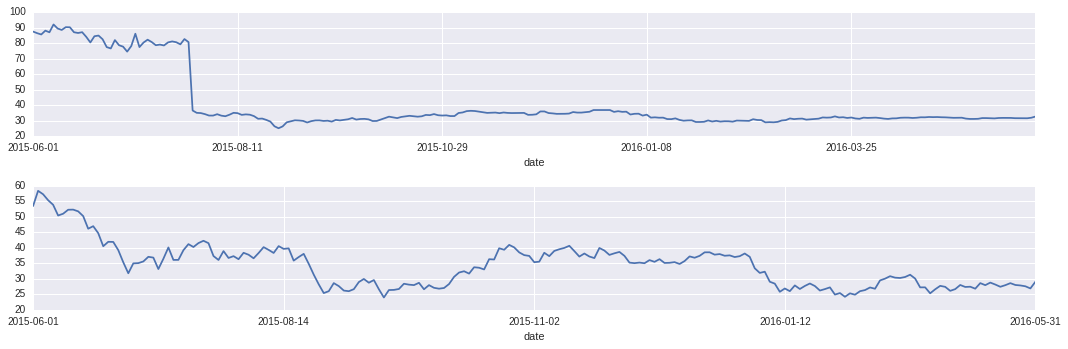

In [104]:
#绘制股价走势图

fig , axes = plt.subplots(2,1,figsize=(15,5))

closepa = pad["close"]
closepa.plot(ax=axes[0])

closekd = kdd["close"]
closekd.plot(ax=axes[1])

fig.tight_layout()

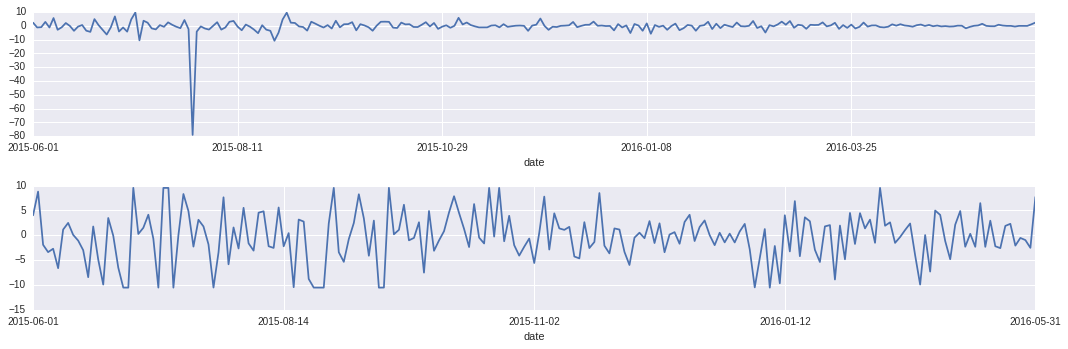

In [105]:
#绘制收益率变动图

fig , axes = plt.subplots(2,1,figsize=(15,5))

rpa.plot(ax=axes[0])

rkd.plot(ax=axes[1])

fig.tight_layout()

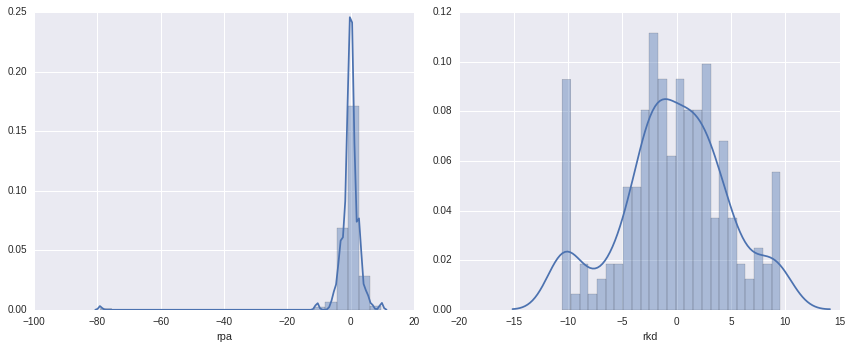

In [141]:
fig , axes = plt.subplots(1,2,figsize=(12,5))

sns.distplot(rpa, ax=axes[0], bins=25)
sns.distplot(rkd, ax=axes[1], bins=25)

fig.tight_layout()

考虑到平安银行有少量数据比较异常，可以将该数据剔除后再进行比较，预期t值可能会更小。

In [108]:
rpa.ix[rpa<-10]

date
2015-07-08   -10.532177
2015-07-27   -79.009581
2015-08-24   -10.811664
Name: rpa, dtype: float64

In [115]:
rpa2 = rpa.drop("2015-07-27")

In [114]:
rpa.size

246

In [116]:
rpa2.size

245

In [117]:
rkd2 = rkd

In [121]:
rkd2.size

201

In [122]:
t2, p2 = stats.ttest_ind(rpa2, rkd2)

In [138]:
t2, p2

# t值反而增加，当然t值都非常小，我们的结论并没有改变。  
# 说明一些异常点可能会对结果会造成较大影响。

(0.59478135010142419, 0.55229261443164712)

In [130]:
rpa2.describe()

count    245.000000
mean      -0.069528
std        2.467951
min      -10.811664
25%       -1.117185
50%        0.000000
75%        0.913248
max        9.683406
Name: rpa, dtype: float64

In [131]:
rpa.describe()

count    246.000000
mean      -0.390422
std        5.603334
min      -79.009581
25%       -1.120820
50%       -0.014182
75%        0.904099
max        9.683406
Name: rpa, dtype: float64

**通过均值和标准差对比，我们不难发现，虽然只是剔除了一组数据，但结果相差甚远。原因是异常点数据太极端。**

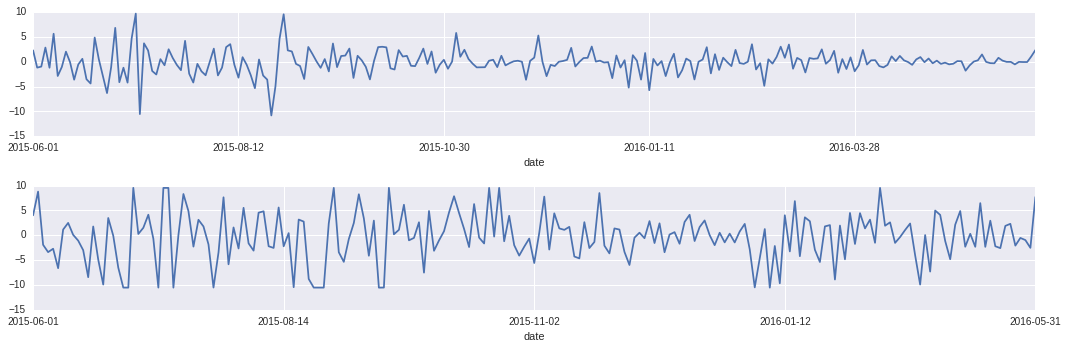

In [125]:
#重新绘制收益率变动图

fig , axes = plt.subplots(2,1,figsize=(15,5))

rpa2.plot(ax=axes[0])

rkd2.plot(ax=axes[1])

fig.tight_layout()

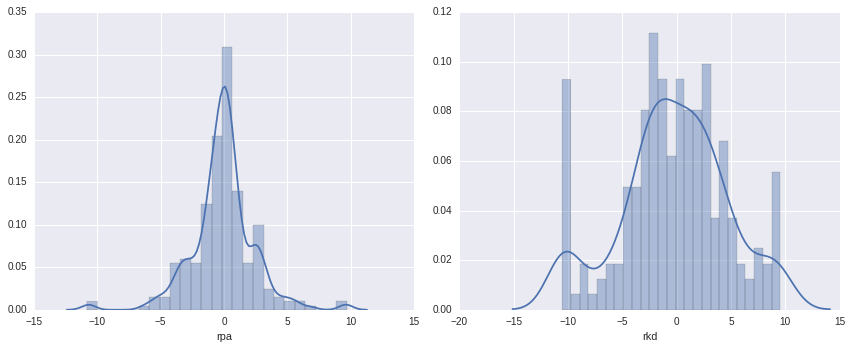

In [140]:
fig , axes = plt.subplots(1,2,figsize=(12,5))

sns.distplot(rpa2, ax=axes[0], bins=25)
sns.distplot(rkd2, ax=axes[1], bins=25)

fig.tight_layout()